In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [12]:
def get_features_targets(data):
    features = np.zeros((data.shape[0],4))
    features[:,0] = data['u'] - data['g']
    features[:,1] = data['g'] - data['r']
    features[:,2] = data['r'] - data['i']
    features[:,3] = data['i'] - data['z']

    targets = data['redshift']

    return features, targets 

In [13]:
def median_diff(predicted, actual):
    return np.median(np.abs(predicted - actual))

In [20]:
def accuracy_by_treedepth(features, targets, depths):

    split = features.shape[0]//2
    train_features = features[:split]
    train_targets = targets[:split]
    test_features = features[split:]
    test_targets = targets[split:]

    median_diffs_training_set = list()
    median_diffs_test_set = list()

    for depth in depths:
        dtr = DecisionTreeRegressor(max_depth=depth)
        dtr.fit(train_features, train_targets)

        median_diff_training_set = median_diff(dtr.predict(train_features), train_targets)
        median_diffs_training_set.append(median_diff_training_set)
        median_diff_test_set = median_diff(dtr.predict(test_features), test_targets)
        median_diffs_test_set.append(median_diff_test_set)

    return median_diffs_training_set, median_diffs_test_set

Depth with lowest median difference : 21


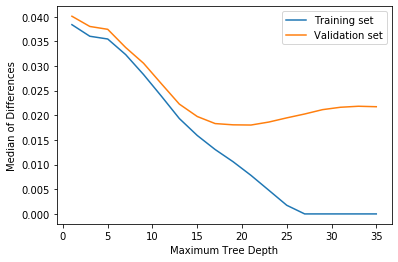

In [21]:
data = np.load('sdss_galaxy_colors.npy')
features, targets = get_features_targets(data)

# Generate several depths to test
tree_depths = [i for i in range(1, 36, 2)]

# Call the function
train_med_diffs, test_med_diffs = accuracy_by_treedepth(features, targets, tree_depths)
print("Depth with lowest median difference : {}".format(tree_depths[test_med_diffs.index(min(test_med_diffs))]))

# Plot the results
train_plot = plt.plot(tree_depths, train_med_diffs, label='Training set')
test_plot = plt.plot(tree_depths, test_med_diffs, label='Validation set')
plt.xlabel("Maximum Tree Depth")
plt.ylabel("Median of Differences")
plt.legend()
plt.show()